In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import time
import random
from IPython.display import clear_output
import string
import numpy as np
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Brief Descriptive Analysis

In [2]:
df = pd.read_csv('car_data.csv')
df.head(3)

,car_id,make,model,milage,year,car_type,price,eng_size,gear_box,fuel,loc_town,link
0,11085244,Toyota,Corolla,225000,2005,Henkilöauto,4380,1.4,Manuaali,Bensiini,Pieksämäki,https://www.nettiauto.com/toyota/corolla/11085244
1,11403380,Toyota,Corolla,101000,2010,Henkilöauto,9800,1.3,Manuaali,Bensiini,Kirkkonummi,https://www.nettiauto.com/toyota/corolla/11403380
2,11349997,Toyota,Corolla,269580,1991,Henkilöauto,300,1.3,Manuaali,Bensiini,Kontiolahti,https://www.nettiauto.com/toyota/corolla/11349997


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 12 columns):
car_id      1228 non-null int64
make        1228 non-null object
model       1228 non-null object
milage      1228 non-null int64
year        1228 non-null int64
car_type    1228 non-null object
price       1228 non-null int64
eng_size    1228 non-null float64
gear_box    1228 non-null object
fuel        1228 non-null object
loc_town    1228 non-null object
link        1228 non-null object
dtypes: float64(1), int64(4), object(7)
memory usage: 115.2+ KB


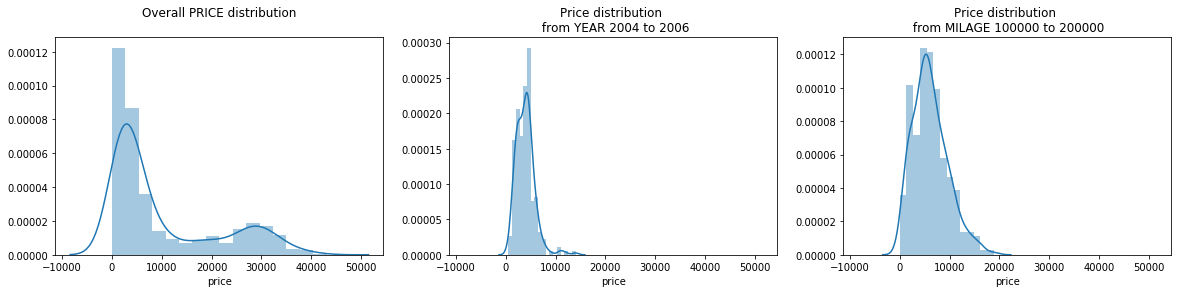

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, 3, figsize=(20, 4), sharex=True)
sns.distplot(df['price'], ax = ax[0]).set_title('Overall PRICE distribution\n')

year_from = 2004
year_to = 2006
milage_from= 100000
milage_to = 200000

#One year plot
sns.distplot(df[(df['year']>= year_from)& (df['year'] <= year_to)]['price'], ax = ax[1]).set_title (f'Price distribution \n from YEAR {year_from} to {year_to}')
#Milage 
sns.distplot(df[(df['milage']>= milage_from)& (df['milage'] <= milage_to)]['price'], ax = ax[2]).set_title (f'Price distribution \n from MILAGE {milage_from} to {milage_to}')
#sns.distplot(xprice, color = 'orange')
plt.show()

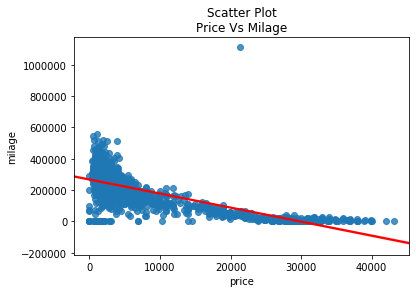

In [5]:
x = df['price']
y = df['milage']
sns.regplot(x,y, line_kws = {'color':'red'}).set_title('Scatter Plot\nPrice Vs Milage')
plt.show()



Linearity Price Vs Milage for year from 1998 to 2006




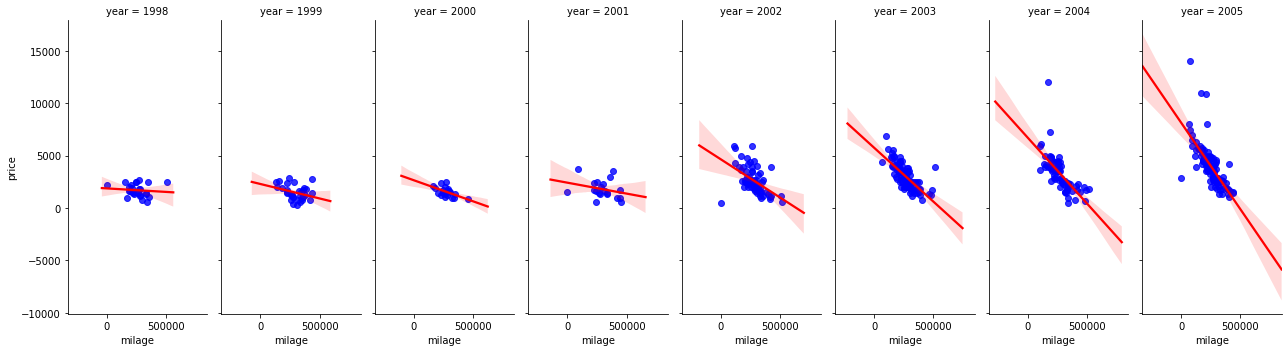

In [6]:
yearfrom = 1998
yearto =2006
param_df = df[(df.year>=yearfrom) & (df.year<yearto) & (df.price>0)]
sns.lmplot(x="milage", y="price", hue="year", col="year", data=param_df, height=5, aspect=.45, x_jitter=.1,
           line_kws ={'color': 'red'}, scatter_kws ={'color': ['blue']})
print(f'\nLinearity Price Vs Milage for year from {yearfrom} to {yearto}\n\n')


Correlation matrix of DataFrame




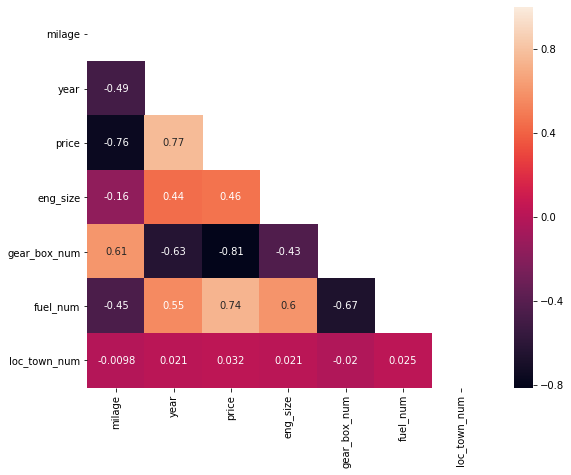

In [7]:
df['gear_box_num'] = df.gear_box.astype('category').cat.codes
df['fuel_num'] = df.fuel.astype('category').cat.codes
df['loc_town_num'] = df.loc_town.astype('category').cat.codes
corr_mat = df.loc [:, df.columns != 'car_id'].corr()
mask = np.triu(np.ones_like(corr_mat, dtype=np.bool))
fig, ax = plt.subplots(1, figsize= (9,7))
ax = sns.heatmap(corr_mat, mask=mask, annot = True)
print('\nCorrelation matrix of DataFrame\n\n')
plt.show()


Checking the extreme values



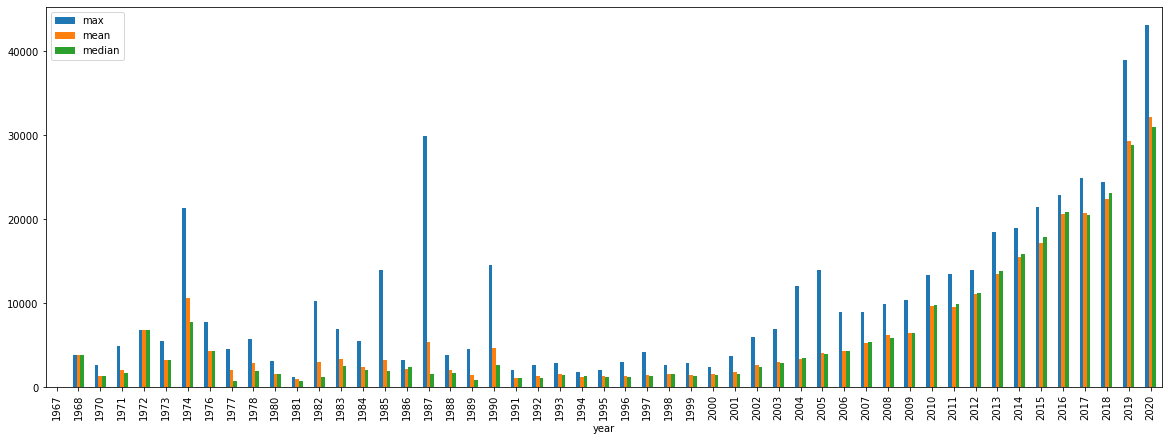

In [8]:
price_year = df.groupby('year')['price'].agg({"returns": [np.max, np.mean, np.median]}).reset_index().droplevel(0, axis=1) 
price_year.columns = ['year', 'max', 'mean', 'median']
price_year.plot(x="year", y=['max', 'mean', 'median'], kind="bar", figsize =(20,7))
print('\nChecking the extreme values\n')
plt.show()

In [9]:
df_out = df[df.columns]
func = lambda x : np.where(x == x.max(), x.mean(), x)
df_out['price'] = df_out.groupby('year')['price'].transform(func)


Data distribution after minimizing the extreme values



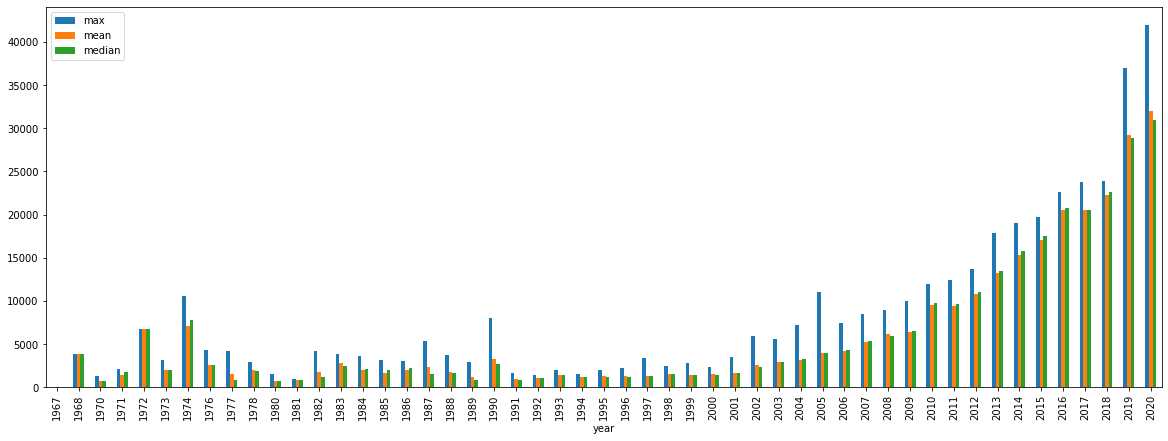

In [10]:
price_year_new = df_out.groupby('year')['price'].agg({"returns": [np.max, np.mean, np.median]}).reset_index().droplevel(0, axis=1) 
price_year_new.columns = ['year', 'max', 'mean', 'median']
price_year_new.plot(x="year", y=['max', 'mean', 'median'], kind="bar", figsize =(20,7))
print('\nData distribution after minimizing the extreme values\n')
plt.show()


Distributions between Price and correlated variables




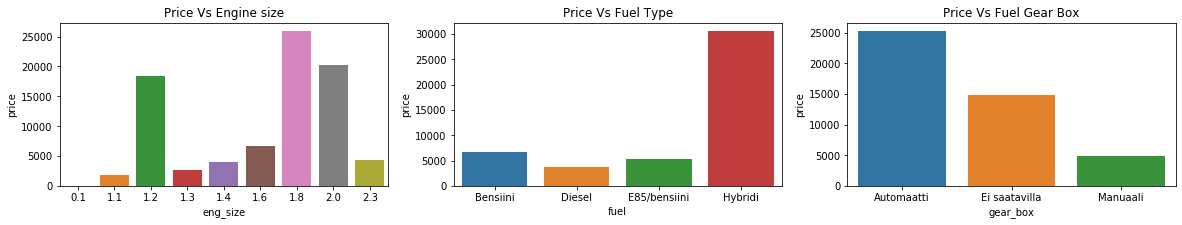

In [11]:
f, axes = plt.subplots(1, 3, figsize=(20, 3))#, sharex=True)
#sns.despine(left=True)

df_means = df[['price', 'eng_size', 'fuel', 'gear_box']]
eng_means = df.groupby('eng_size').price.mean()
sns.barplot(x = eng_means.index, y = eng_means, ax = axes[0]).set_title ('Price Vs Engine size')

fuel_means = df.groupby('fuel').price.mean()
sns.barplot(x = fuel_means.index, y = fuel_means, ax = axes[1]).set_title ('Price Vs Fuel Type')

gear_means = df.groupby('gear_box').price.mean()
sns.barplot(x = gear_means.index, y = gear_means, ax = axes[2]).set_title ('Price Vs Fuel Gear Box')
print ("\nDistributions between Price and correlated variables\n\n")
plt.show()

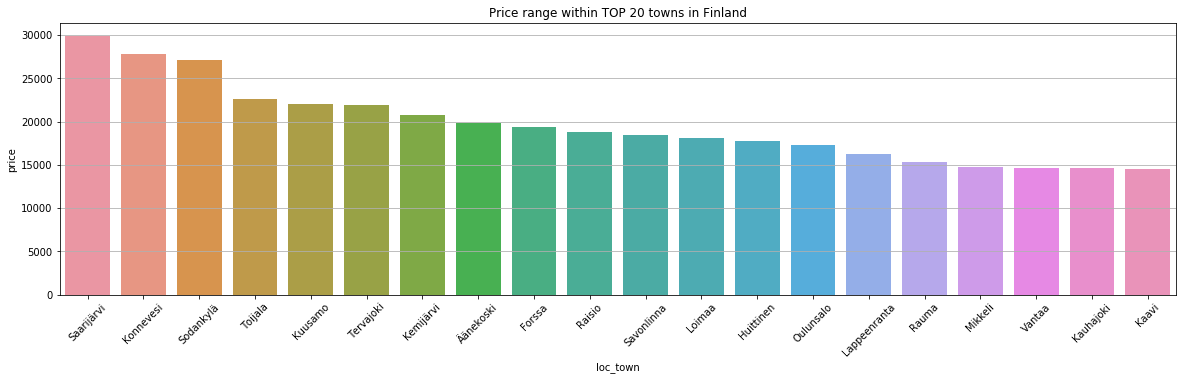

In [12]:
plt.figure(figsize=(20,5))
town_means = df.groupby('loc_town').price.mean().sort_values(ascending = False).head(20)
sns.barplot(x = town_means.index, y = town_means).set_title('Price range within TOP 20 towns in Finland')
plt.xticks(rotation = 45)
plt.grid(axis = 'y')
plt.show()

# Machine Learning part

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#droping outliers
df_to_train = df[df['price']>0]
func = lambda x : np.where(x == x.max(), x.mean(), x)
df_to_train['price'] = df_to_train.groupby('year')['price'].transform(func)

X = df_to_train[['milage', 'year', 'eng_size','gear_box_num', 'fuel_num']]
y = df_to_train[['price']]
#y = y['price'].apply(lambda x: float(x))
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size  =0.2)

#Scaling
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [14]:
#RandomForest
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
clf = RandomForestRegressor(n_estimators=20, random_state=0)
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_clf))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_clf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_clf)))
print('R2_score:', r2_score(y_test, pred_clf))
pred_clf_test = sc.transform([[300000,2005,1.6,2,0]])
clf.predict(pred_clf_test)

Mean Absolute Error: 1100.5745875235432
Mean Squared Error: 2764095.8930101944
Root Mean Squared Error: 1662.5570345134613
R2_score: 0.9743608083769362


array([2895.])

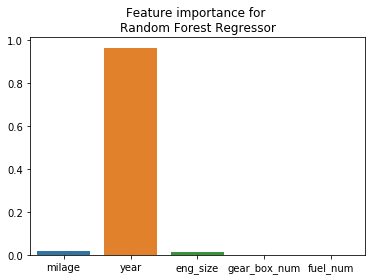

In [15]:
X.columns
sns.barplot(X.columns,clf.feature_importances_)
plt.title ('Feature importance for \nRandom Forest Regressor')
plt.show()

In [16]:
from sklearn.neighbors import KNeighborsRegressor
import warnings
from math import sqrt
warnings.warn('my warning')
error_rate = []
# Will take some time
for i in range(1,40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(sqrt(metrics.mean_squared_error(y_test, pred_i)))

Optinaml No K: 5 
Error: 1626.5385501929422


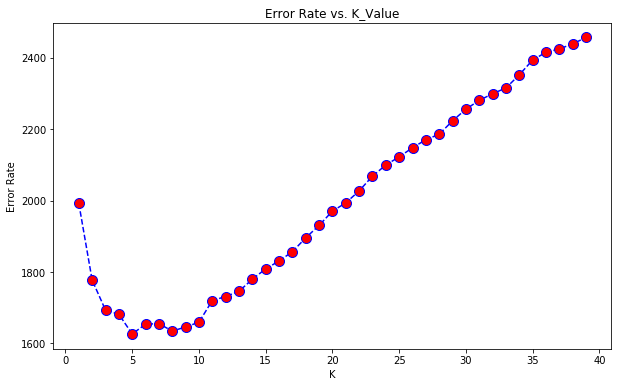

In [27]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K_Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
optimal_k = error_rate.index(min(error_rate))+1
print("Optinaml No K:", error_rate.index(min(error_rate))+1,'\nError:' , min(error_rate))

In [28]:
from sklearn.neighbors import KNeighborsRegressor
import warnings
knn = KNeighborsRegressor(n_neighbors=optimal_k, weights = 'uniform')
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_knn))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_knn))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_knn)))
print('R2_score:', r2_score(y_test, pred_knn))

pred_knn_test = sc.transform([[300000,2005,1.6,2,0]])
knn.predict(pred_knn_test)[0]

Mean Absolute Error: 1082.8797894225625
Mean Squared Error: 2645627.6552637583
Root Mean Squared Error: 1626.5385501929422
R2_score: 0.9754596956682593


array([2950.])

In [29]:
# Gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=100)
reg.fit(X_train,y_train)
pred_grad = reg.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_grad))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_grad))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_grad)))
print('R2_score:', r2_score(y_test, pred_grad))
pred_grad_test = sc.transform([[300000,2005,1.6,2,0]])
reg.predict(pred_grad_test)

Mean Absolute Error: 998.2350964303482
Mean Squared Error: 2313890.638687131
Root Mean Squared Error: 1521.1478030379333
R2_score: 0.9785368207991132


array([3048.54061102])

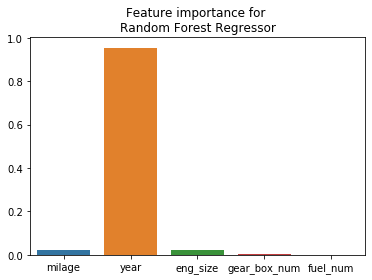

In [20]:
X.columns
sns.barplot(X.columns,reg.feature_importances_)
plt.title ('Feature importance for \nRandom Forest Regressor')
plt.show()

In [30]:
error_models = pd.DataFrame({'Model':['RandomForestRegressor','KnnRegressor','GradientBoostingRegressor'],
                             'MSE':[metrics.mean_squared_error(y_test, pred_clf),
                                    metrics.mean_squared_error(y_test, pred_knn),
                                    metrics.mean_squared_error(y_test, pred_grad)],
                             'RMSE':[np.sqrt(metrics.mean_squared_error(y_test, pred_clf)),
                                    np.sqrt(metrics.mean_squared_error(y_test, pred_knn)),
                                    np.sqrt(metrics.mean_squared_error(y_test, pred_grad))],
                             'R2_score': [r2_score(y_test, pred_clf),
                                         r2_score(y_test, pred_knn),
                                         r2_score(y_test, pred_grad)]})

In [33]:
error_models.sort_values(by = 'R2_score', ascending = False)

,Model,MSE,RMSE,R2_score
2,GradientBoostingRegressor,2.313891e+06,1521.147803,0.978537
1,KnnRegressor,2.645628e+06,1626.538550,0.975460
0,RandomForestRegressor,2.764096e+06,1662.557035,0.974361


_______________________________________________

# Building function section

In [4]:
# Collecting variable from user
#make = 'Audi'
def main_block_user_data():
    print("Hi there, please specify the parameters of your car \nand we will make the price prediction based on real market data in Finland\n")
    make = input ('Car Manufacture (ex.: Audi, Toyota):')
    make = ''.join (re.split (r'\W+',make)[0]).title()
    #clear_output()
    #model = 'q15'
    
    model = input ('Car Model:')
    model = '-'.join (re.split (r'\W+',model)).title()
    #clear_output()
    #year = 2015
    print('Car year')
    year = str(1)
    while (not year.isdigit() or int(year)<1900 or int(year)>2030):
        #clear_output()
        #print('Car year')
        year = input ('write year between 1900 and 2030:')
    #clear_output()
    #gear_box = ['Automatti','Manuaali']
    
    print ("Car Mileage (km)")
    mileage = 'f'
    while not mileage.isdigit():
        #clear_output()
        #print ("Car Mileage (km)")
        mileage = input('Write mileage as a whole number in km (ex.:250200)')
    
    print ("Engine size")
    eng_size = 'h'
    while re.match(r'^-?\d+(?:\.\d+)?$', eng_size) is None:
        #clear_output()
        #print ("Engine size")
        eng_size = input ('Write in decimals(ex.: 1.2, 2.0...)')
    eng_size = round(float(eng_size),1)
   
    gear_box = None
    print('Gear box')
    while gear_box not in ['1','2']:
        #clear_output()
        #print('Gear box')
        gear_box = input (' Write 1 or 2:\n 1.Automatti \n 2.Manuaali')  
    gear_box = ['Automatti','Manuaali'][int(gear_box)-1]
    #clear_output()
    #fuel = ['Bensiini', 'Deiesel','Hybridi', 'Sähkö', 'Kaasu', 'E85/bensiini']
    
    fuel =None
    print("Fuel Type")
    while fuel not in list('123456'):
        #clear_output()
        #print("Fuel Type")
        fuel  = input(" Write Number from 1 to 6:\n 1.Bensiini \n 2.Diesel\n 3.Hybridi\n 4.Sähkö\n 5.Kaasu\n 6.E85/bensiini")
    fuel = ['Bensiini', 'Diesel','Hybridi', 'Sähkö', 'Kaasu', 'E85/bensiini'][int(fuel)-1]
    clear_output()
    request_info = f'Your request: \n Make: {make} \n Model: {model} \n Year: {year} \n Mileage: {mileage} km \n Engine size: {eng_size} \n Gear Box: {gear_box} \n Fuel Type: {fuel}'
    print(request_info)
    return request_info,make,model,year,mileage,gear_box,fuel,eng_size;

In [5]:
#request_info,make,model,year,mileage,gear_box,fuel,eng_size = main_block_user_data()

In [6]:
def user_data_collector():
    request_info,make,model,year,mileage,gear_box,fuel,eng_size = main_block_user_data()
    print('\nDo you want to make changes to your request?')
    repeat = 'h'
    while repeat.lower() not in ['yes', 'no']:
        #print('Do you want to make changes to your request?')
        repeat =input ('Please write "yes" or "no"')
    while repeat == 'yes':
        clear_output()
        request_info,make,model,year,mileage,gear_box,fuel,eng_size = main_block_user_data()
        repeat = 'h'
        print('\nDo you want to make changes to your request?')
        while repeat.lower() not in ['yes', 'no']:
            repeat =input ('Please write "yes" or "no"')
        #for name in [request_info,make,model,year,mileage,gear_box,fuel,eng_size]:
        #    del globals()[name]
                
    if repeat == 'no':
        #clear_output()
        print("\nAlrigth, then we will estimate the price based on your car specifications")
        return request_info,make,model,year,mileage,gear_box,fuel,eng_size;

In [7]:
# form a link
def link_form (make,model,year):
    year_from = str(int(year)-2)
    year_to = str(int(year)+2)
    link = 'https://www.nettiauto.com/'+make+'/'+model+'/?yfrom='+year_from+'&yto='+year_to+'&id_country[]=73'
    return link

In [8]:
def alert_check(link):
    #link = link_form()
    page = requests.get(link)
    soup = BeautifulSoup(page.text, 'html.parser')
    if len(soup.find_all('div', id='msg'))>0 or soup.find_all('h1')[0].text == 'Hups, sivua ei löytynyt':
        alert = 1
    else:
        alert = 0
    return alert

In [9]:
def user_request_processing():
    request_info,make,model,year,mileage,gear_box,fuel,eng_size =user_data_collector()
    link = link_form(make,model,year)
    alert = alert_check(link)
    while alert==1:
        print("Sorry, we could not find any data based on your request\n")
        print(request_info)
        print("\nPlease make sure there is no spelling errors")
        print("\nWould you like to make a new request or exit from session?")
        answer = None
        while answer not in ('1','2'):
            print("Would you like to make a new request or exit from session?")
            answer = input("\n1.Make new request \n2. Exit from session")
        if answer == '1':
            clear_output()
            request_info,make,model,year,mileage,gear_box,fuel,eng_size =user_data_collector()
            link = link_form(make,model,year)
            alert = alert_check(link)
        if answer == '2':
            print('Alrigth, come back next time.')
            break
    if alert==0:
        print('\nWe found the data based on your request, so now please chill and relax, soon we will get back with estimated price.')
        return request_info,make,model,year,mileage,gear_box,fuel,eng_size, link;

In [10]:
#request_info,make,model,year,mileage,gear_box,fuel, link = user_request_processing()

In [11]:
#print(request_info,'\n',make,model,year,mileage,gear_box,fuel, link)
#link

In [12]:
# code for scraping 
def scrapper(link,make,model,year,mileage,eng_size,gear_box,fuel):
#link = 'https://www.nettiauto.com/toyota/corolla?id_country[]=73&page=1'
    sleep_period = 4
    page = requests.get(link)
    soup = BeautifulSoup(page.text, 'html.parser')
    try:
        last_page_to_scrap = int(soup.find_all(class_="pageNavigation dot_block")[-1].text)
    except IndexError:
        try:
            last_page_to_scrap = int(soup.find_all(class_="pageNavigation")[-2].text)
        except:
            last_page_to_scrap =1

    #lists 
    car_id_ls = []
    make_ls = []
    mileage_ls = []
    model_ls = []
    year_ls = []
    car_type_ls = []
    price_ls = []
    eng_size_ls = []
    gear_box_ls = []
    fuel_ls = []
    loc_town_ls=[]
    link_ls = []


    for i in range(1,last_page_to_scrap+1):
        #link = 'https://www.nettiauto.com/toyota/corolla?id_country[]=73&page='+str(i)
        link = link+'&page='+str(i)
        page = requests.get(link)
        soup = BeautifulSoup(page.text, 'html.parser')
        blocks = soup.find_all(class_= re.compile("^listingVifUrl"))
        for block in blocks:
            bl1_part = block.find(class_= re.compile("^childVifUrl"))
            keys = list(bl1_part.attrs.keys())

            car_id_ls.append(bl1_part['data-id'] if 'data-id' in keys else None)
            make_ls.append(bl1_part['data-make'] if 'data-make' in keys else None)
            mileage_ls.append(bl1_part['data-mileage'] if 'data-mileage' in keys else None)
            model_ls.append(bl1_part['data-model'] if 'data-model' in keys else None)
            year_ls.append(bl1_part['data-year'] if 'data-year' in keys else None)
            car_type_ls.append(bl1_part['data-vtype'] if 'data-vtype' in keys else None)
            price_ls.append(bl1_part['data-price'] if 'data-price' in keys else None)
            link_ls.append(bl1_part['href'] if 'href' in keys else None)

            eng_size_ls.append(float(re.findall(r"[-+]?\d*\.\d+|\d+", block.find(class_="eng_size").text)[0]) if len(block.find(class_="eng_size").text)>0 else None)
            loc_town_ls.append(block.find('b', class_="gray_text").text.translate(str.maketrans('', '', string.punctuation+' '+'›')).replace('\n','') if len(block.find('b', class_="gray_text").text)>0 else None)
            gear_and_fuel_block = block.find('div', class_=re.compile('^vehicle_other_info clearfix_nett')).ul.find_all('li')
            fuel_ls.append(gear_and_fuel_block[2].text if len(gear_and_fuel_block)>=4 else None)
            gear_box_ls.append(gear_and_fuel_block[3].text if len(gear_and_fuel_block)>=4 else None)
            clear_output()
            print("Cars' data loaded:", len(car_id_ls))
            print('Pages loaded:', i)
            print('Pages left:', (last_page_to_scrap)-i)
        if i % sleep_period ==0:
            time.sleep(random.randint(1,2))
            sleep_period = random.randint(2,6)
#     df_scraped = pd.DataFrame({'car_id':car_id_ls,'make':make_ls,'model': model_ls, 'milage':mileage_ls
#                        ,'year':year_ls, 'car_type':car_type_ls, 'price':price_ls, 'eng_size':eng_size_ls,
#                       'gear_box': gear_box_ls,'fuel': fuel_ls, 'loc_town':loc_town_ls,'link': link_ls})
#     df_scraped = df_scraped.fillna(method = 'bfill')
#     df_scraped['eng_size'] = df_scraped['eng_size'].astype(float)
#     df_scraped = df_scraped.dropna(axis= 0, how = 'any')
#     df_scraped = df_scraped[df_scraped['price'] >0]
    #df_scraped.to_csv(f'{make}_{model}_{year}_{eng_size}_{mileage}_{gear_box}_{fuel}_table.csv', index = False)
    print('Data loading has completed')
    return car_id_ls,make_ls,model_ls,mileage_ls,year_ls,car_type_ls,price_ls,eng_size_ls,gear_box_ls,fuel_ls,loc_town_ls,link_ls

In [13]:
def df_creation (car_id_ls,make_ls,model_ls,mileage_ls,year_ls,car_type_ls,price_ls,eng_size_ls,gear_box_ls,fuel_ls,loc_town_ls,link_ls):
    df_scraped = pd.DataFrame({'car_id':car_id_ls,'make':make_ls,'model': model_ls, 'milage':mileage_ls
                       ,'year':year_ls, 'car_type':car_type_ls, 'price':price_ls, 'eng_size':eng_size_ls,
                      'gear_box': gear_box_ls,'fuel': fuel_ls, 'loc_town':loc_town_ls,'link': link_ls})
    df_scraped = df_scraped.fillna(method = 'bfill')
    df_scraped['eng_size'] = df_scraped['eng_size'].astype(float)
    df_scraped = df_scraped.dropna(axis= 0, how = 'any')
    df_scraped['price'] = df_scraped['price'].astype(int)#.apply(lambda x: int(x) if x is not None else x)
    df_scraped = df_scraped[df_scraped['price'] >0]
    #df_scraped.to_csv(f'{make}_{model}_{year}_{eng_size}_{mileage}_{gear_box}_{fuel}_table.csv', index = False)
    print('Data Frame created')
    return df_scraped

In [14]:
def creat_ML_dfs (df_scraped,mileage,year,eng_size,gear_box,fuel):
    df_scraped_for_ml = df_scraped[['milage', 'year','eng_size','gear_box','fuel', 'price']]
    df_user = pd.DataFrame({'milage': mileage, 'year': year, 'eng_size': eng_size, 'gear_box': gear_box, 'fuel': fuel, 'price':None }, index = [0])
    df_ml_user_data_in = df_scraped_for_ml.append(df_user, ignore_index = True )
    
    
    df_ml_user_data_in['milage']= df_ml_user_data_in['milage'].astype(int)
    df_ml_user_data_in['year']= df_ml_user_data_in['year'].astype(int)
    #Encoding categorical variables
    df_ml_user_data_in['gear_box_num'] = df_ml_user_data_in.gear_box.astype('category').cat.codes
    df_ml_user_data_in['fuel_num'] = df_ml_user_data_in.fuel.astype('category').cat.codes
    return df_ml_user_data_in

In [29]:
def train_and_test_split_scale(df_ml_user_data_in):
    from sklearn.preprocessing import StandardScaler
    # transforming outliers to mean
    df_out = df_ml_user_data_in[df_ml_user_data_in.columns]
    #df_out['price'] = df_out['price'].apply(lambda x: int(x) if x is not None else x)
    func = lambda x : np.where(x == x.max(), x.mean(), x)
    df_out['price'] = df_out.groupby('year')['price'].transform(func)
    #df_out['price'] = df_out.groupby('year')['price'].transform(func)
    #df_out['price'] = df_out.groupby('year')['price'].transform(func)
    
    X = df_out.iloc[:-1,:][['milage', 'year', 'eng_size','gear_box_num', 'fuel_num']]
    y = df_out.iloc[:-1,:][['price']]
    
    #for kNeighbours
    X_train_knn = df_ml_user_data_in.iloc[:-1,:][['milage', 'year', 'eng_size','gear_box_num', 'fuel_num','price']]

    X_predict_not_transformed = df_ml_user_data_in.iloc[-1,:][['milage', 'year', 'eng_size','gear_box_num', 'fuel_num']].tolist()

    #Scaling
        #for GradientBoostingRegressor
    sc = StandardScaler().fit(X)
    #X_train = sc.transform(X_train)
    #y_train = sc.transform(y_train)
    X_predict = sc.transform([X_predict_not_transformed])
            #for knn
    sc = StandardScaler().fit(X_train_knn)
    X_train_knn = sc.transform(X_train_knn)
    return X, y, X_predict, X_train_knn,X_predict_not_transformed, sc;


In [75]:
#train test split 
def Prediction_ML(X, y, X_predict):
    from sklearn import metrics
    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size  =0.1)
    sc = StandardScaler().fit(X_train)
    X_train = sc.transform(X_train)
    X_test = sc.transform(X_test)


    from sklearn.neighbors import KNeighborsRegressor
    import warnings
    from math import sqrt
    warnings.warn('my warning')
    error_rate = []
    # Will take some time
    for i in range(1,40):
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(X_train,y_train)
        pred_i = knn.predict(X_test)
        error_rate.append(sqrt(metrics.mean_squared_error(y_test, pred_i)))
    optimal_k = error_rate.index(min(error_rate))+1
    # Make predictions with best k
    sc = StandardScaler().fit(X)
    X_scaled = sc.transform(X)

    knn = KNeighborsRegressor(n_neighbors=optimal_k, weights = 'uniform')
    knn.fit(X_scaled,y)
    predict_value = knn.predict(X_predict)[0][0]
    predict_value = int(round(predict_value))
    predict_value = (predict_value-100)//100*100+100
    return predict_value

In [19]:
def most_similar_ads(X_train_knn, X_predict_not_transformed,predict_value,sc):
    from sklearn.neighbors import NearestNeighbors
    value_to_predict = [X_predict_not_transformed +[predict_value]]
    value_to_predict_scaled = sc.transform(value_to_predict)
    neigh = NearestNeighbors(n_neighbors=5, radius = 0.3)
    neigh.fit(X_train_knn)
    neigh_indexes = neigh.kneighbors(value_to_predict_scaled,return_distance=False)[0]
    return neigh_indexes

In [20]:
def output (df_scraped,predict_value,request_info,neigh_indexes):
    from tabulate import tabulate
    output_df = df_scraped.iloc[:-1,1:].loc[neigh_indexes.tolist(),:].reset_index(drop = True)
    print('Estimated price for your car:',predict_value,'€\n' )
    print(request_info,'\n\n')
    print('Simillar cars to your request\n')
    print(tabulate(output_df,headers='keys', showindex = 'not'))

In [21]:
def main_script():
    # collecting user data
    request_info,make,model,year,mileage,gear_box,fuel,eng_size, link = user_request_processing()
    # scrapping 
    car_id_ls,make_ls,model_ls,mileage_ls,year_ls,car_type_ls,price_ls,eng_size_ls,gear_box_ls,fuel_ls,loc_town_ls,link_ls = scrapper(link,make,model,year,mileage,eng_size,gear_box,fuel)
    # Creating df
    df_scraped = df_creation (car_id_ls,make_ls,model_ls,mileage_ls,year_ls,car_type_ls,price_ls,eng_size_ls,gear_box_ls,fuel_ls,loc_town_ls,link_ls)
    # creating ml df
    df_ml_user_data_in = creat_ML_dfs (df_scraped,mileage,year,eng_size,gear_box,fuel)
    #data split for ml
    X, y, X_predict, X_train_knn,X_predict_not_transformed, sc = train_and_test_split_scale(df_ml_user_data_in)
    #Knn alg approach
    predict_value = Prediction_ML(X, y, X_predict)
    # finding neighbors index numbers
    neigh_indexes = most_similar_ads(X_train_knn, X_predict_not_transformed,predict_value,sc)
    # Creating the report
    output (df_scraped,predict_value,request_info,neigh_indexes)

In [22]:
# Final question exit or make new request
def car_pricer():
    main_script()
    end_response = None
    print('Would you like to make another request?')
    while end_response not in ('1','2'):
        #print('Would you like to make another request?')
        end_response = input('Plese write 1 or 2 \n1.No, exit the program \n2.Yes,please')
    while end_response == '2':
        clear_output()
        main_script()
        end_response = None
        print('\n\n\nWould you like to make another request?')
        while end_response not in ('1','2'):
            #print('Would you like to make another request?')
            end_response = input('\nPlese write 1 or 2 \n1.No, exit the program \n2.Yes,please')
        if end_response == '1':
            #clear_output()
            print('\nAlrigth, see you next time.')
            break  

In [23]:
#car_pricer()